In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '4'

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [2]:
df = pd.read_csv('train.csv', skipinitialspace=True) 
del df['features_duration_ms']
del df['popularity_confidence']
pd.set_option('display.max_columns', None)

In [3]:
df.head()

name  duration_ms  explicit  popularity  \
0                             Long Road       241760     False          46   
1  Daniâl My Son, Where Did You Vanish?       444000     False           0   
2                    Ondskapens Galakse       333506     False           3   
3                       Can't Look Away       269800     False          23   
4                         Thunderground       307651     False          25   

                  artists              album_name  danceability  energy  key  \
0           Funki Porcini           Hed Phone Sex         0.690   0.513    5   
1           Siavash Amini    A Trail of Laughters         0.069   0.196    1   
2               Kvelertak              Nattesferd         0.363   0.854    2   
3       The Wood Brothers       One Drop of Truth         0.523   0.585    5   
4  The Darkraver;DJ Vince  Happy Hardcore Top 100         0.643   0.687    7   

   loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0   -12.529   1.0       0.0975      0.302000           0.53600     0.281   
1   -24.801   0.0       0.0805      0.283000           0.93400     0.360   
2    -7.445   NaN       0.0397      0.000089           0.80000     0.262   
3    -5.607   1.0       0.0765      0.066400           0.00127     0.117   
4   -11.340   1.0       0.0539      0.000576           0.09690     0.299   

   valence    tempo  time_signature  n_beats  n_bars  processing        genre  
0   0.6350  142.221             4.0    567.0   141.0    1.279305      j-dance  
1   0.0336   75.596             4.0    617.0   155.0    2.367412      iranian  
2   0.4890  116.628             4.0    652.0   162.0    3.700483  black-metal  
3   0.3850  140.880             4.0    619.0   155.0    1.279305    bluegrass  
4   0.6370  143.956             4.0    733.0   183.0    4.067086        happy

In [4]:
# transformed the genres into a numerical variable for the original df

genre_n = {'afrobeat': 0, 'black-metal': 1, 'bluegrass': 2, 'brazil': 3, 'breakbeat': 4, 'chicago-house': 5, 'disney': 6, 'forro': 7, 'happy': 8, 'idm': 9, 'indian': 10, 'industrial': 11, 'iranian': 12, 'j-dance': 13, 'j-idol': 14, 'mandopop': 15, 'sleep': 16, 'spanish': 17, 'study': 18, 'techno': 19}
genre_n

#Legend: 
# afrobeat: 0 
# black-metal: 1
# bluegrass: 2
#brazil: 3
#breakbeat: 4
#chicago-house: 5
#disney: 6
#forro: 7
#happy: 8 
#idm: 9
#indian: 10
#industrial: 11 
#iranian: 12 
#j-dance: 13 
#j-idol: 14
#mandopop: 15 
#sleep: 16 
#spanish: 17
#study: 18 
#techno: 19

numgenres = df.replace({"genre": genre_n})
numgenres.head()

name  duration_ms  explicit  popularity  \
0                             Long Road       241760     False          46   
1  Daniâl My Son, Where Did You Vanish?       444000     False           0   
2                    Ondskapens Galakse       333506     False           3   
3                       Can't Look Away       269800     False          23   
4                         Thunderground       307651     False          25   

                  artists              album_name  danceability  energy  key  \
0           Funki Porcini           Hed Phone Sex         0.690   0.513    5   
1           Siavash Amini    A Trail of Laughters         0.069   0.196    1   
2               Kvelertak              Nattesferd         0.363   0.854    2   
3       The Wood Brothers       One Drop of Truth         0.523   0.585    5   
4  The Darkraver;DJ Vince  Happy Hardcore Top 100         0.643   0.687    7   

   loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0   -12.529   1.0       0.0975      0.302000           0.53600     0.281   
1   -24.801   0.0       0.0805      0.283000           0.93400     0.360   
2    -7.445   NaN       0.0397      0.000089           0.80000     0.262   
3    -5.607   1.0       0.0765      0.066400           0.00127     0.117   
4   -11.340   1.0       0.0539      0.000576           0.09690     0.299   

   valence    tempo  time_signature  n_beats  n_bars  processing  genre  
0   0.6350  142.221             4.0    567.0   141.0    1.279305     13  
1   0.0336   75.596             4.0    617.0   155.0    2.367412     12  
2   0.4890  116.628             4.0    652.0   162.0    3.700483      1  
3   0.3850  140.880             4.0    619.0   155.0    1.279305      2  
4   0.6370  143.956             4.0    733.0   183.0    4.067086      8

In [5]:
todrop = ['name','artists','album_name', 'explicit']

nostrings = numgenres.drop(columns = todrop)

nostrings.head()

duration_ms  popularity  danceability  energy  key  loudness  mode  \
0       241760          46         0.690   0.513    5   -12.529   1.0   
1       444000           0         0.069   0.196    1   -24.801   0.0   
2       333506           3         0.363   0.854    2    -7.445   NaN   
3       269800          23         0.523   0.585    5    -5.607   1.0   
4       307651          25         0.643   0.687    7   -11.340   1.0   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0975      0.302000           0.53600     0.281   0.6350  142.221   
1       0.0805      0.283000           0.93400     0.360   0.0336   75.596   
2       0.0397      0.000089           0.80000     0.262   0.4890  116.628   
3       0.0765      0.066400           0.00127     0.117   0.3850  140.880   
4       0.0539      0.000576           0.09690     0.299   0.6370  143.956   

   time_signature  n_beats  n_bars  processing  genre  
0             4.0    567.0   141.0    1.279305     13  
1             4.0    617.0   155.0    2.367412     12  
2             4.0    652.0   162.0    3.700483      1  
3             4.0    619.0   155.0    1.279305      2  
4             4.0    733.0   183.0    4.067086      8

In [6]:
nostrings.shape

(15000, 18)

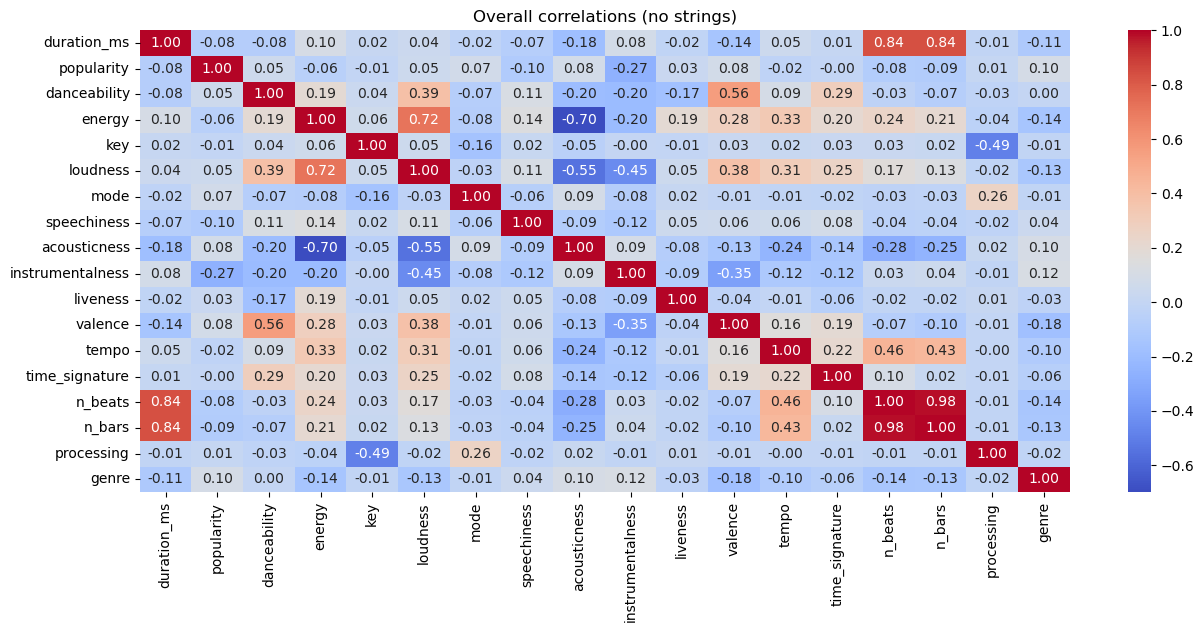

In [7]:
plt.figure(figsize=(15,6))
sns.heatmap(nostrings.corr(), cmap='coolwarm', fmt=".2f", annot=True)

plt.title('Overall correlations (no strings)')
plt.show()

In [8]:
Q1 = nostrings.quantile(0.25)
Q3 = nostrings.quantile(0.75)
IQR = Q3 - Q1

In [9]:
normal_outlier_threshold = 1.5

normal_outliers = (nostrings < (Q1 - normal_outlier_threshold * IQR)) | (nostrings > (Q3 + normal_outlier_threshold * IQR))

normal_outliers.head()

#Now, the outliers DataFrame will contain True for values that are considered outliers and False for non-outliers.

duration_ms  popularity  danceability  energy    key  loudness   mode  \
0        False       False         False   False  False     False  False   
1        False       False         False   False  False      True  False   
2        False       False         False   False  False     False  False   
3        False       False         False   False  False     False  False   
4        False       False         False   False  False     False  False   

   speechiness  acousticness  instrumentalness  liveness  valence  tempo  \
0        False         False             False     False    False  False   
1        False         False             False     False    False  False   
2        False         False             False     False    False  False   
3        False         False             False     False    False  False   
4        False         False             False     False    False  False   

   time_signature  n_beats  n_bars  processing  genre  
0           False    False   False       False  False  
1           False    False   False       False  False  
2           False    False   False       False  False  
3           False    False   False       False  False  
4           False    False   False       False  False

In [10]:
normal_outliers.head()

duration_ms  popularity  danceability  energy    key  loudness   mode  \
0        False       False         False   False  False     False  False   
1        False       False         False   False  False      True  False   
2        False       False         False   False  False     False  False   
3        False       False         False   False  False     False  False   
4        False       False         False   False  False     False  False   

   speechiness  acousticness  instrumentalness  liveness  valence  tempo  \
0        False         False             False     False    False  False   
1        False         False             False     False    False  False   
2        False         False             False     False    False  False   
3        False         False             False     False    False  False   
4        False         False             False     False    False  False   

   time_signature  n_beats  n_bars  processing  genre  
0           False    False   False       False  False  
1           False    False   False       False  False  
2           False    False   False       False  False  
3           False    False   False       False  False  
4           False    False   False       False  False

In [11]:
normal_outliers.shape

(15000, 18)

In [12]:
#fig, axs = plt.subplots(6,3, figsize=(12,12))

#sns.countplot(normal_outliers['duration_ms'], ax=axs[0][0])
#axs[0][0].set_title('Duration (ms)')

#sns.countplot(normal_outliers['popularity'], ax=axs[0][1])
#axs[0][1].set_title('Popularity')

#sns.countplot(normal_outliers['danceability'], ax=axs[0][2])
#axs[0][2].set_title('Danceability')

#sns.countplot(normal_outliers['energy'], ax=axs[1][0])
#axs[1][0].set_title('Energy')

#sns.countplot(normal_outliers['key'], ax=axs[1][1])
#axs[1][1].set_title('Key')

#sns.countplot(normal_outliers['loudness'], ax=axs[1][2])
#axs[1][2].set_title('Loudness')

#sns.countplot(normal_outliers['mode'], ax=axs[2][0])
#axs[2][0].set_title('Mode')

#sns.countplot(normal_outliers['speechiness'], ax=axs[2][1])
#axs[2][1].set_title('Speechiness')

#sns.countplot(normal_outliers['acousticness'], ax=axs[2][2])
#axs[2][2].set_title('Acousticness')

#sns.countplot(normal_outliers['instrumentalness'], ax=axs[3][0])
#axs[3][0].set_title('instrumentalness')

#sns.countplot(normal_outliers['liveness'], ax=axs[3][1])
#axs[3][1].set_title('liveness')

#sns.countplot(normal_outliers['valence'], ax=axs[3][2])
#axs[3][2].set_title('valence')

#sns.countplot(normal_outliers['tempo'], ax=axs[4][0])
#axs[4][0].set_title('tempo')

#sns.countplot(normal_outliers['time_signature'], ax=axs[4][1])
#axs[4][1].set_title('Time signature')

#sns.countplot(normal_outliers['n_beats'], ax=axs[4][2])
#axs[4][2].set_title('Number of beats')

#sns.countplot(normal_outliers['n_bars'], ax=axs[5][0])
#axs[5][0].set_title('Number of bars')

#sns.countplot(normal_outliers['processing'], ax=axs[5][1])
#axs[5][1].set_title('Processing')

#plt.show()

## Subsets by Genre

In [13]:
#Legend: 
# afrobeat: 0 
# black-metal: 1
# bluegrass: 2
#brazil: 3
#breakbeat: 4
#chicago-house: 5
#disney: 6
#forro: 7
#happy: 8 
#idm: 9
#indian: 10
#industrial: 11 
#iranian: 12 
#j-dance: 13 
#j-idol: 14
#mandopop: 15 
#sleep: 16 
#spanish: 17
#study: 18 
#techno: 19

genres = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

sortedgenres = nostrings.sort_values(by = "genre")

unique_genres = sortedgenres['genre'].unique()

subset = {}

for genre in unique_genres:
    subset[genre] = nostrings[nostrings['genre'] == genre]


afrobeat = subset[0]
black_metal = subset[1]
bluegrass = subset[2]
brazil = subset[3]
breakbeat = subset[4]
chicago_house = subset[5]
disney = subset[6]
forro = subset[7]
happy = subset[8]
idm = subset[9]
indian = subset[10]
industrial = subset[11]
iranian = subset[12]
j_dance = subset[13]
j_idol = subset[14]
mandopop = subset[15]
sleep = subset[16]
spanish = subset[17]
study = subset[18]
techno = subset[19]
subset[0].shape  

(750, 18)

## Outliers by genre

In [14]:
z_threshold = 3

for i in subset:
    for column in subset[i].columns:
        sub = subset[i]
        z_scores = np.abs((sub[column] - sub[column].mean()) / sub[column].std())
        outliers = z_scores > z_threshold 
        sub = sub[~outliers]
        subset[i] = sub

In [15]:
subset[2].head()

duration_ms  popularity  danceability  energy  key  loudness  mode  \
3        269800          23         0.523   0.585    5    -5.607   1.0   
27       136266          28         0.397   0.933    3    -9.578   NaN   
47       288760          32         0.591   0.177    9   -17.299   1.0   
54       269493          21         0.585   0.184   11   -14.493   1.0   
56       279293          17         0.593   0.584    2    -6.916   NaN   

    speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
3        0.0765        0.0664          0.001270    0.1170    0.385  140.880   
27       0.0503        0.2750          0.969000    0.0951    0.977  135.491   
47       0.0811        0.9260          0.001060    0.2940    0.522   70.959   
54       0.0313        0.6960          0.000177    0.1770    0.509  128.610   
56       0.0269        0.5770          0.002280    0.2030    0.665   96.017   

    time_signature  n_beats  n_bars  processing  genre  
3              4.0    619.0   155.0    1.279305      2  
27             NaN    292.0    71.0    1.738916      2  
47             NaN    341.0    86.0    1.343558      2  
54             NaN    568.0   141.0    0.748116      2  
56             4.0    439.0   109.0    3.700483      2

In [16]:
subset[2].shape

(651, 18)

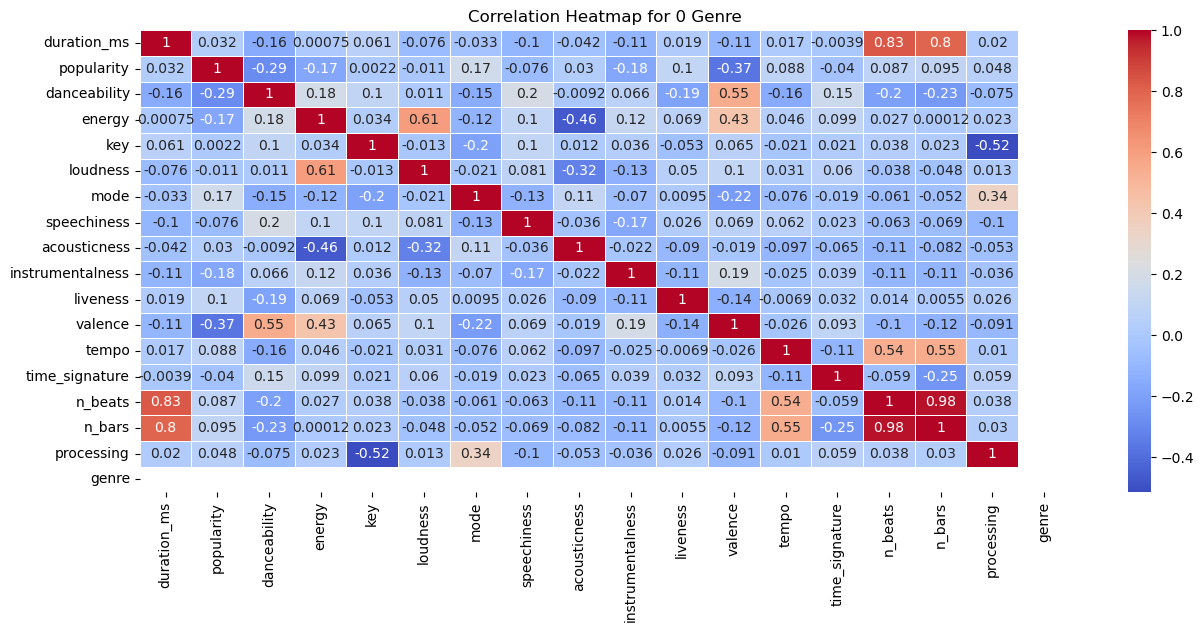

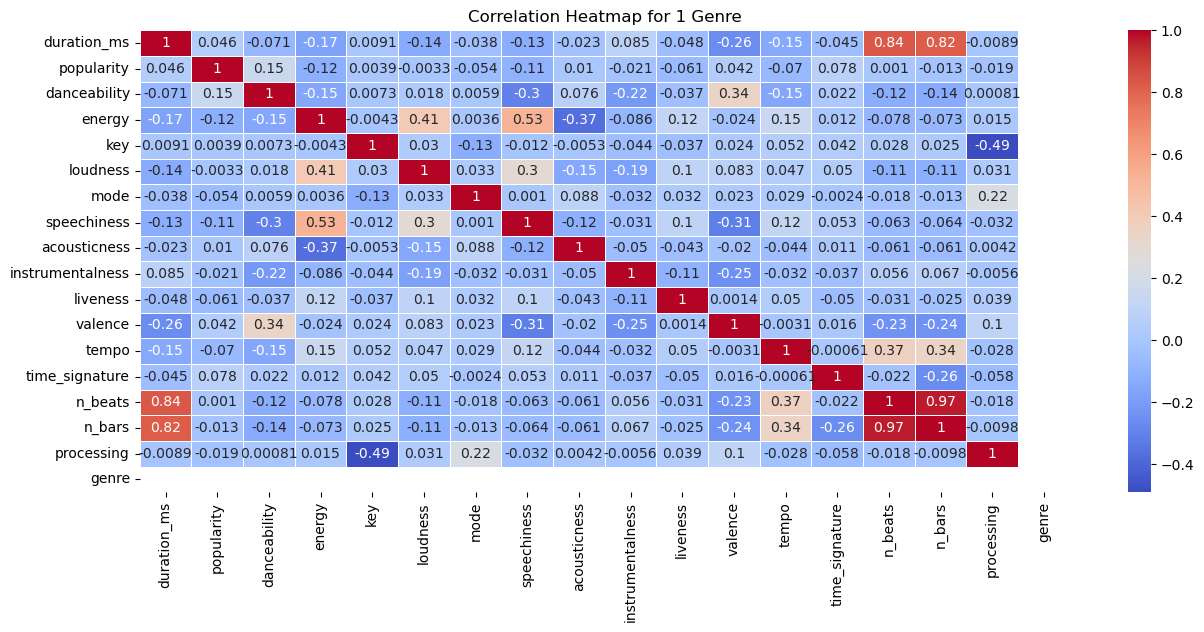

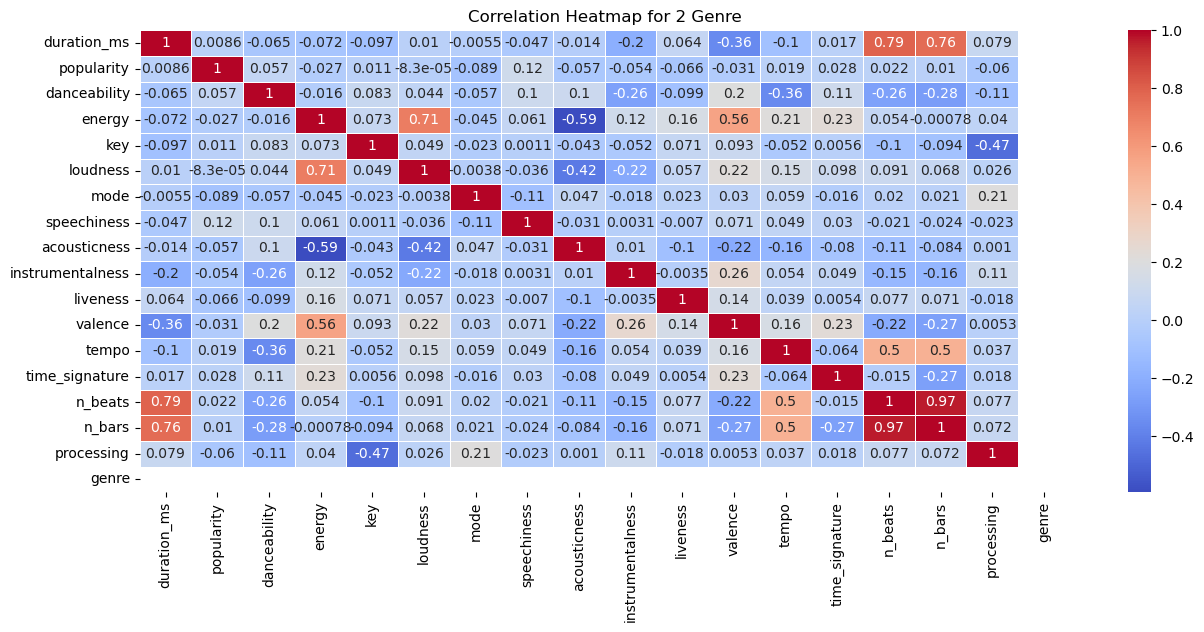

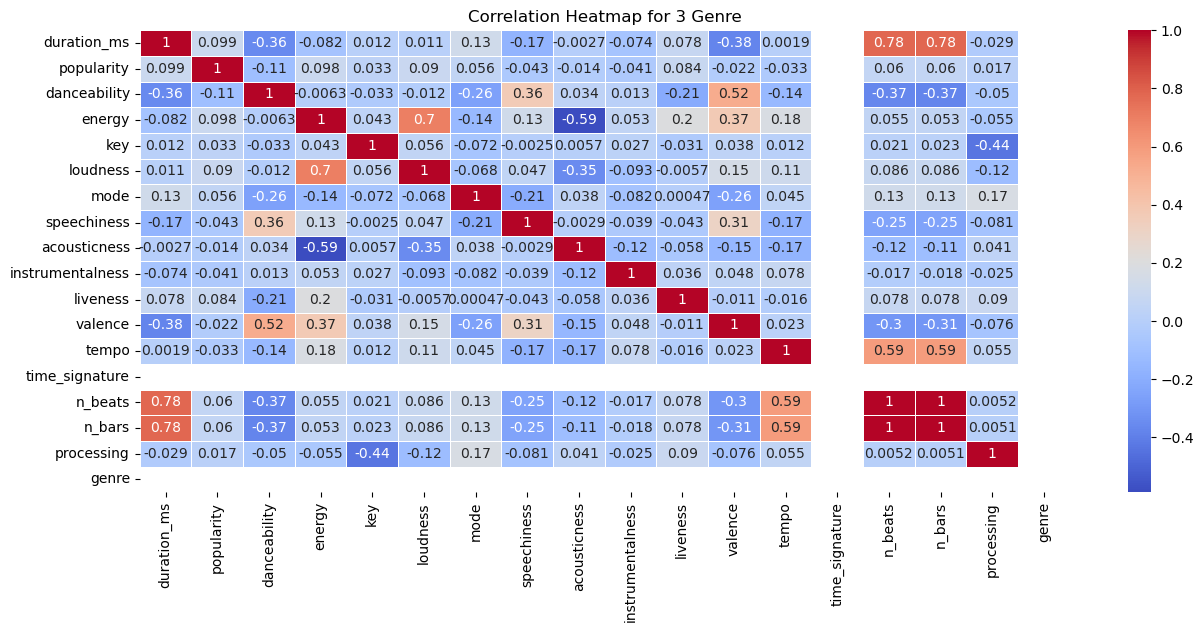

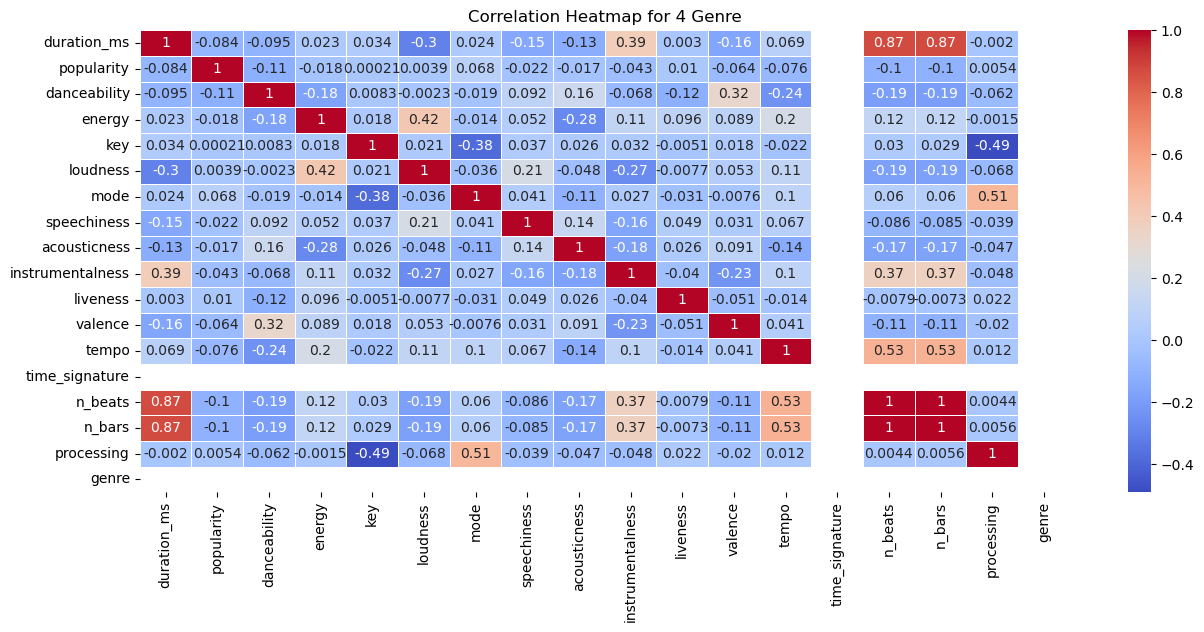

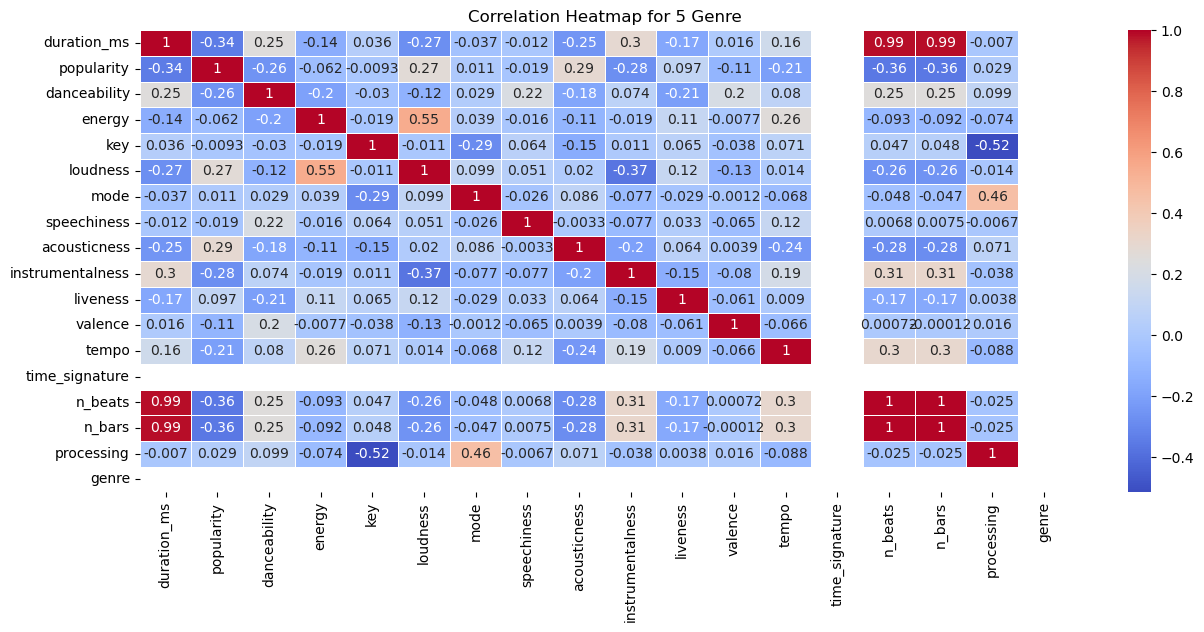

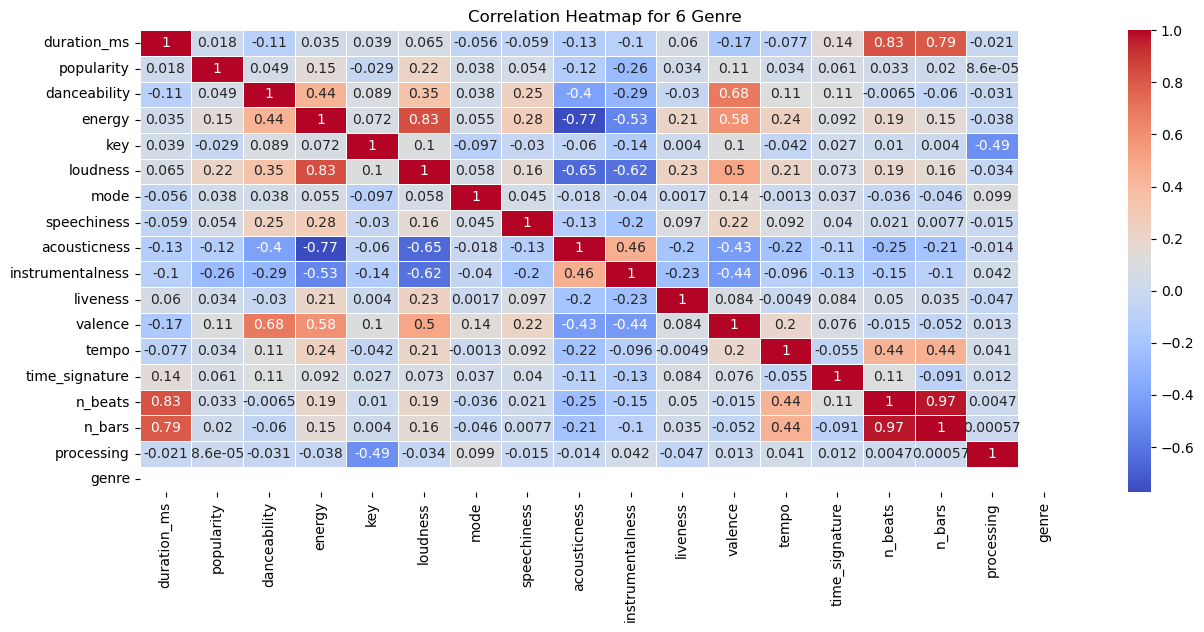

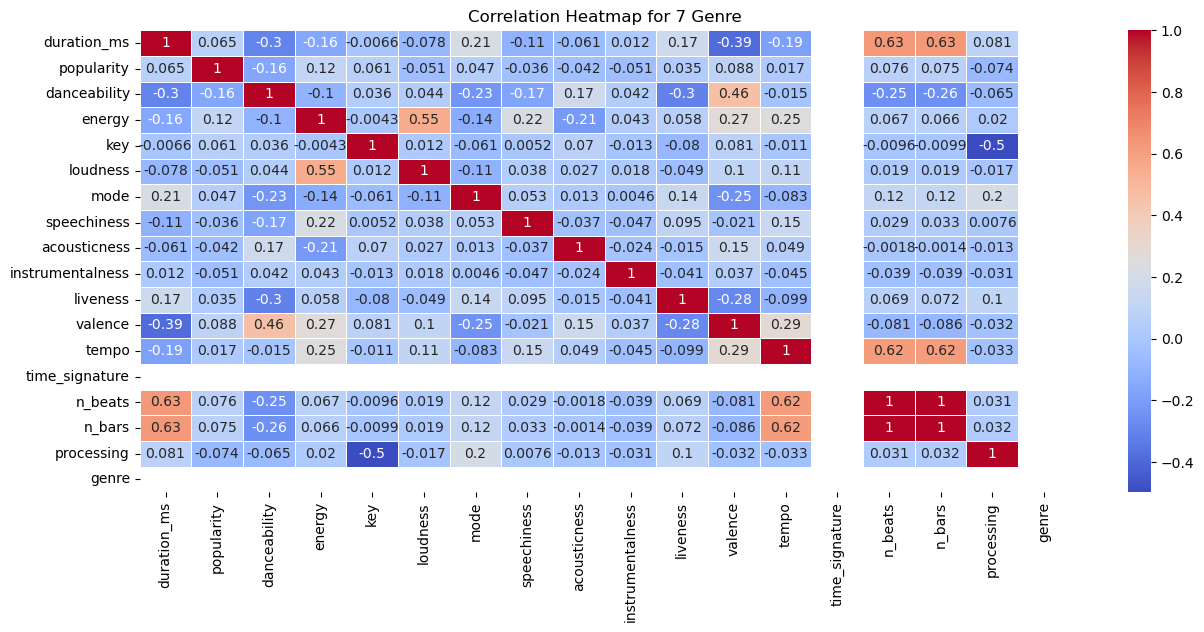

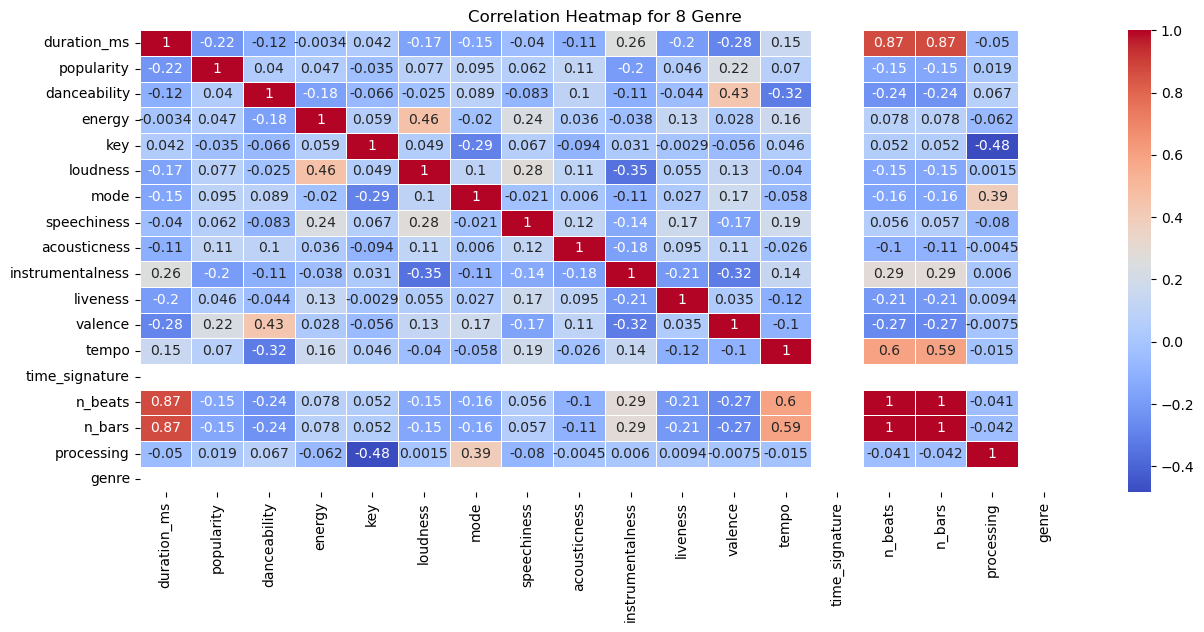

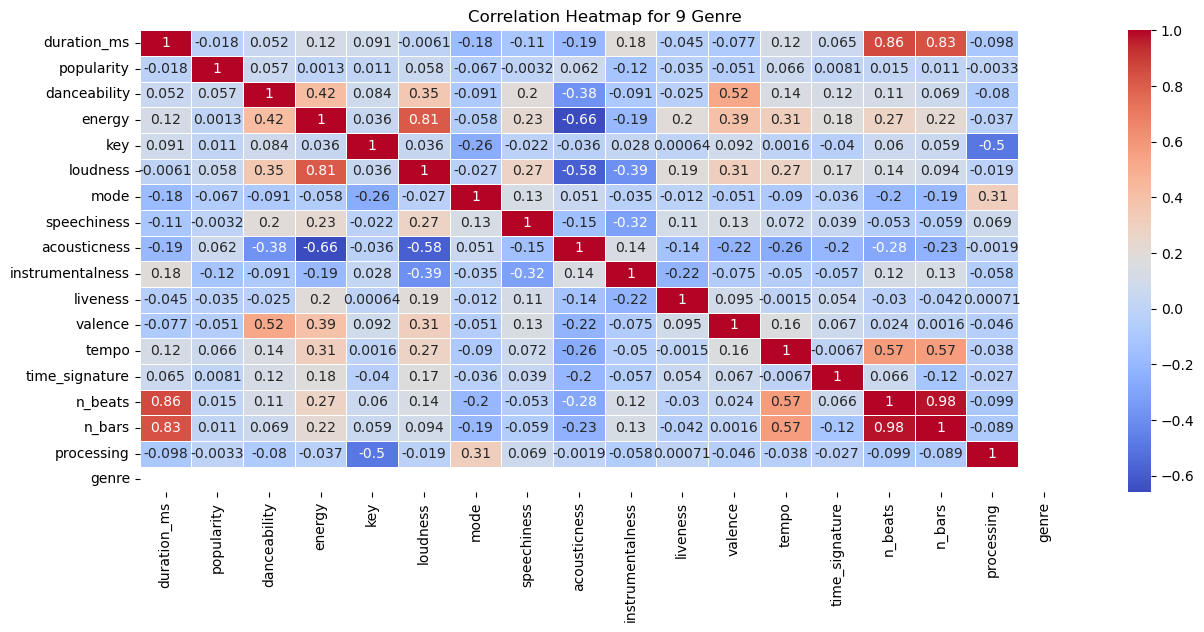

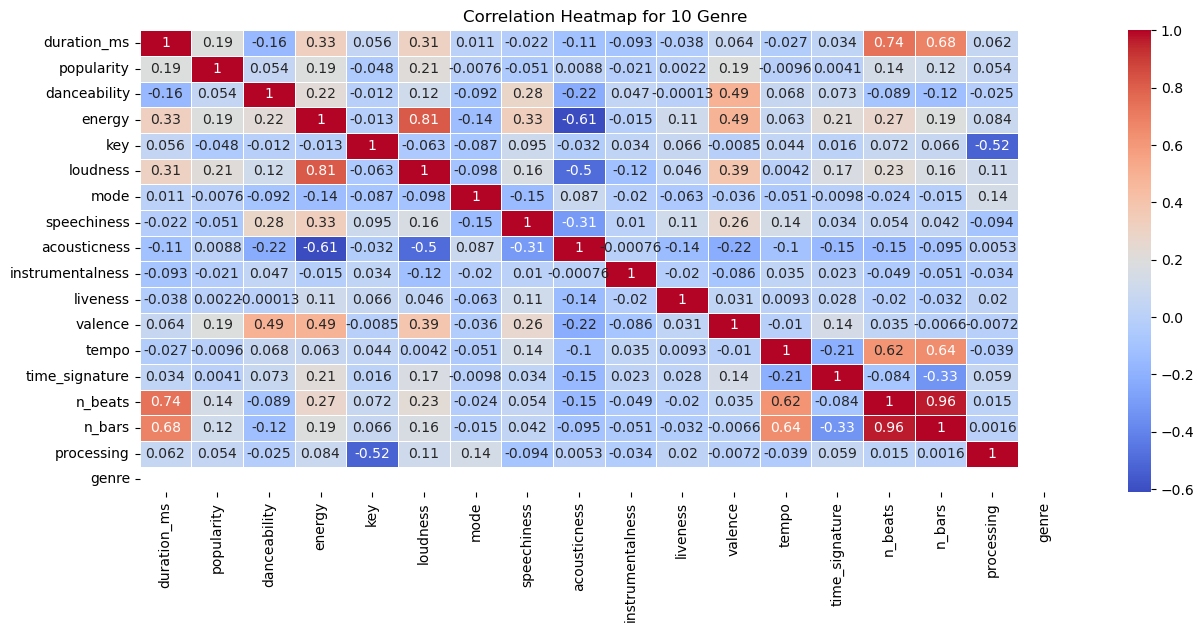

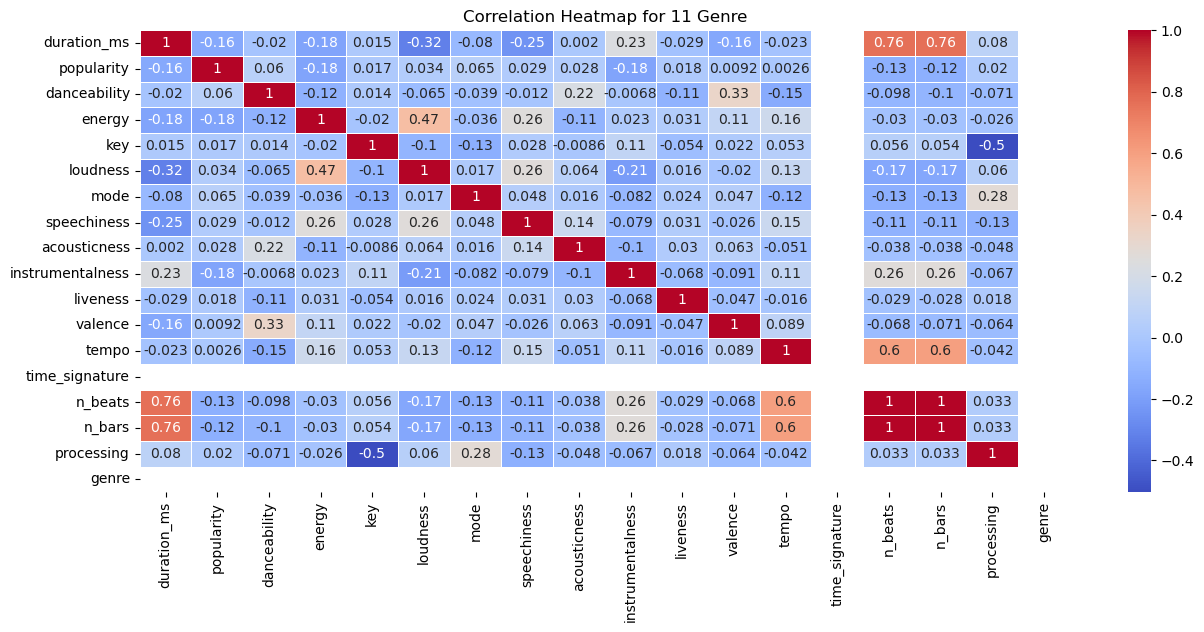

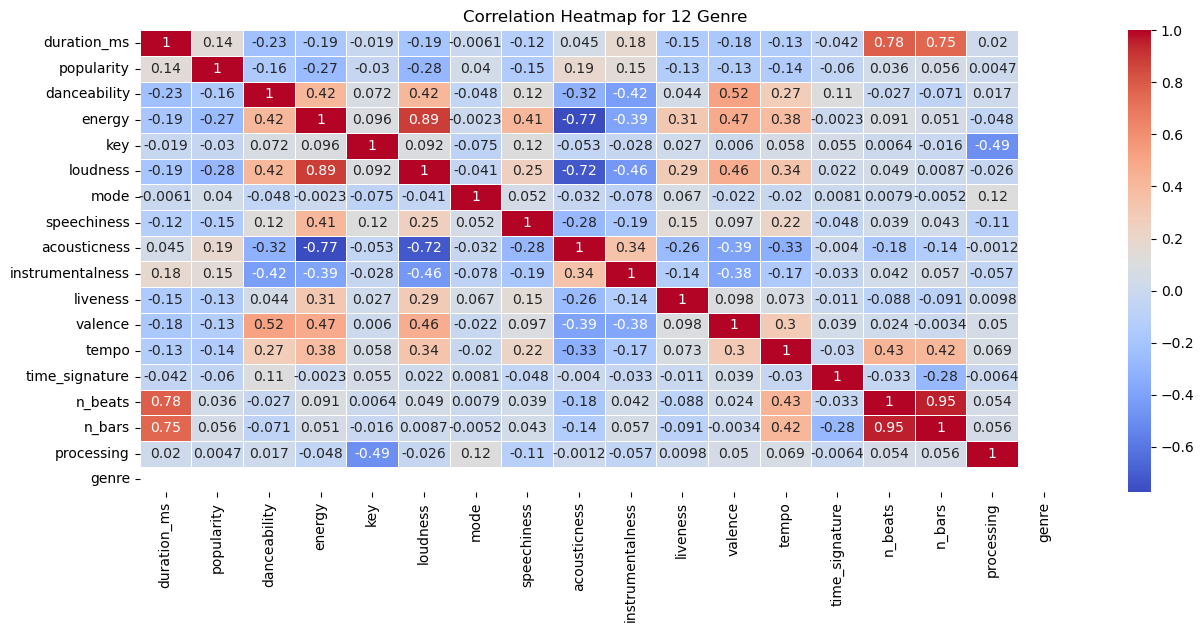

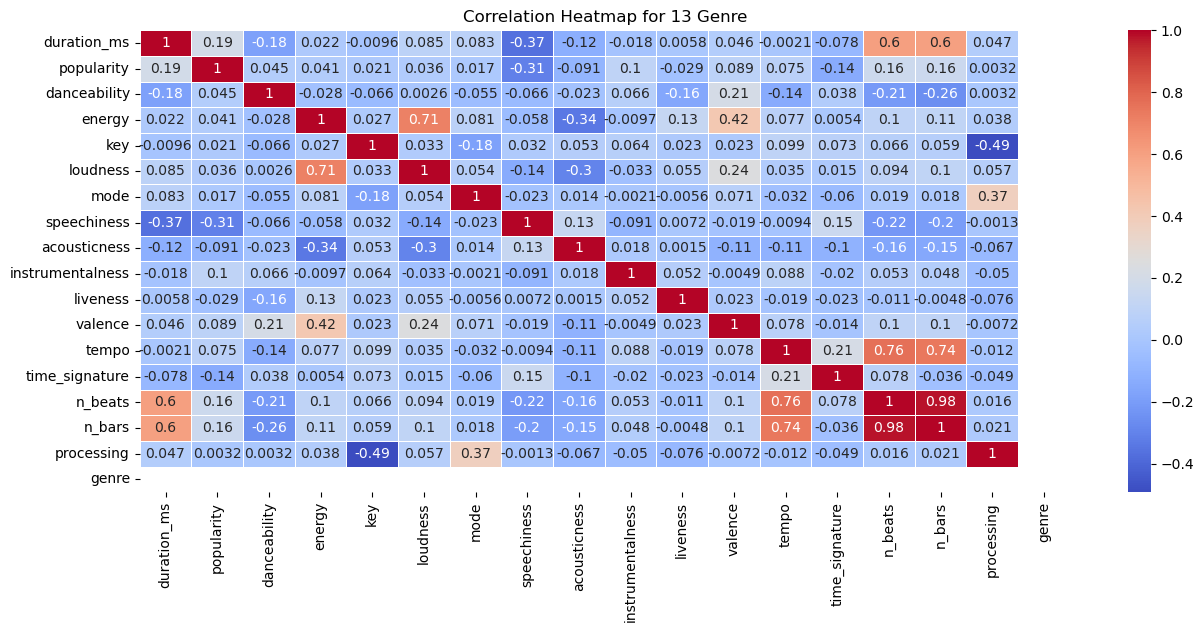

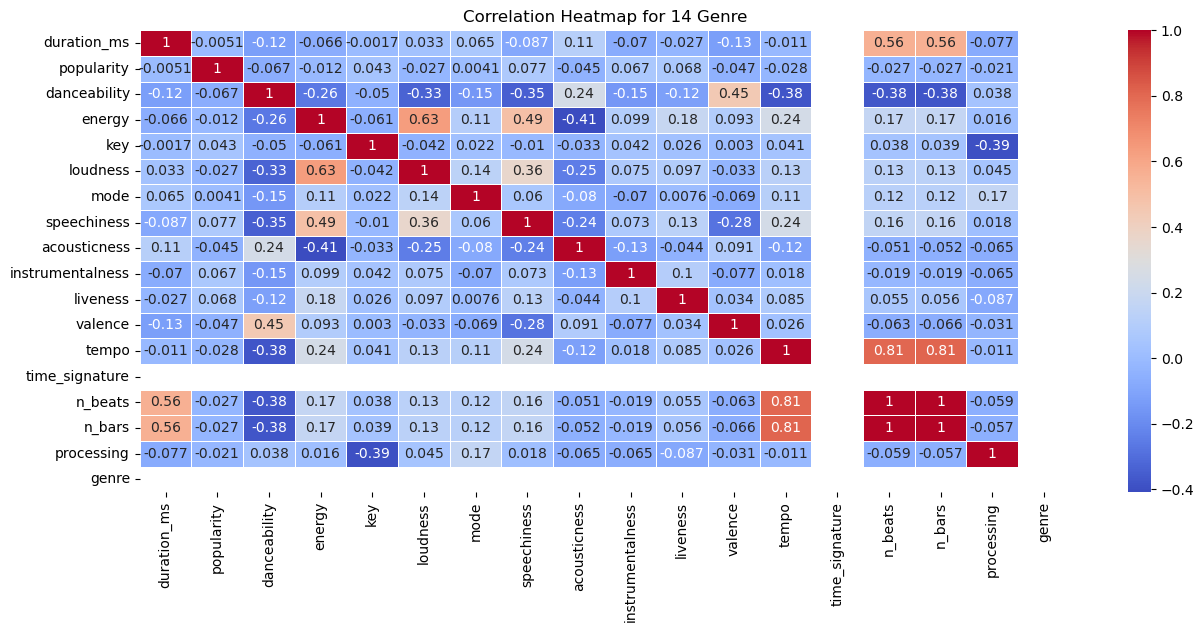

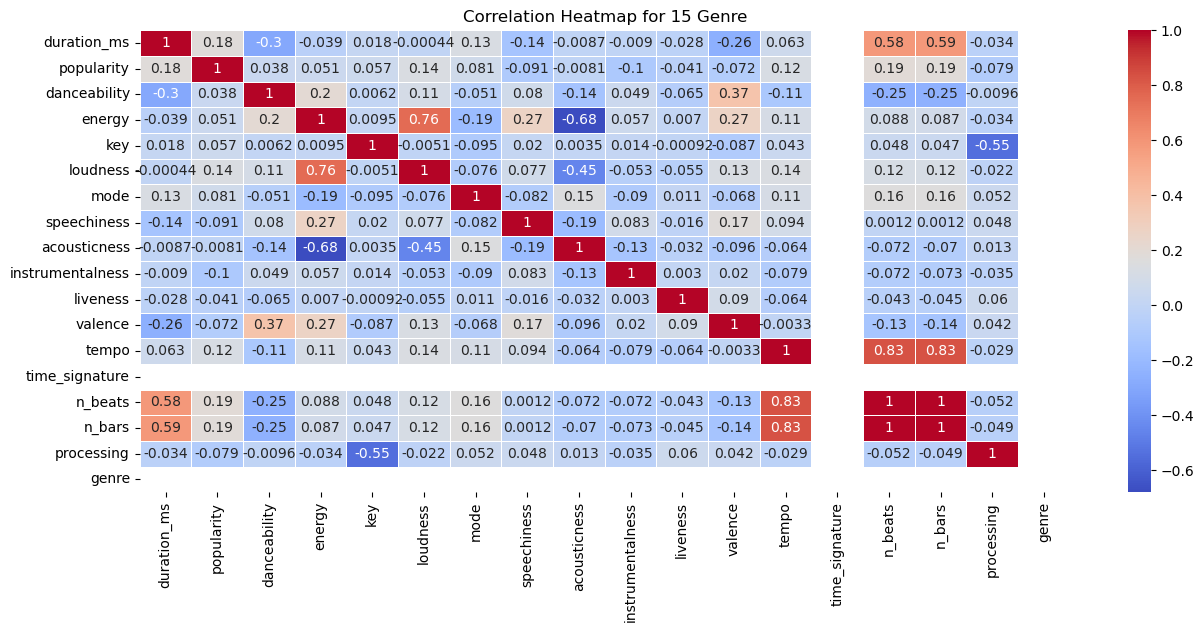

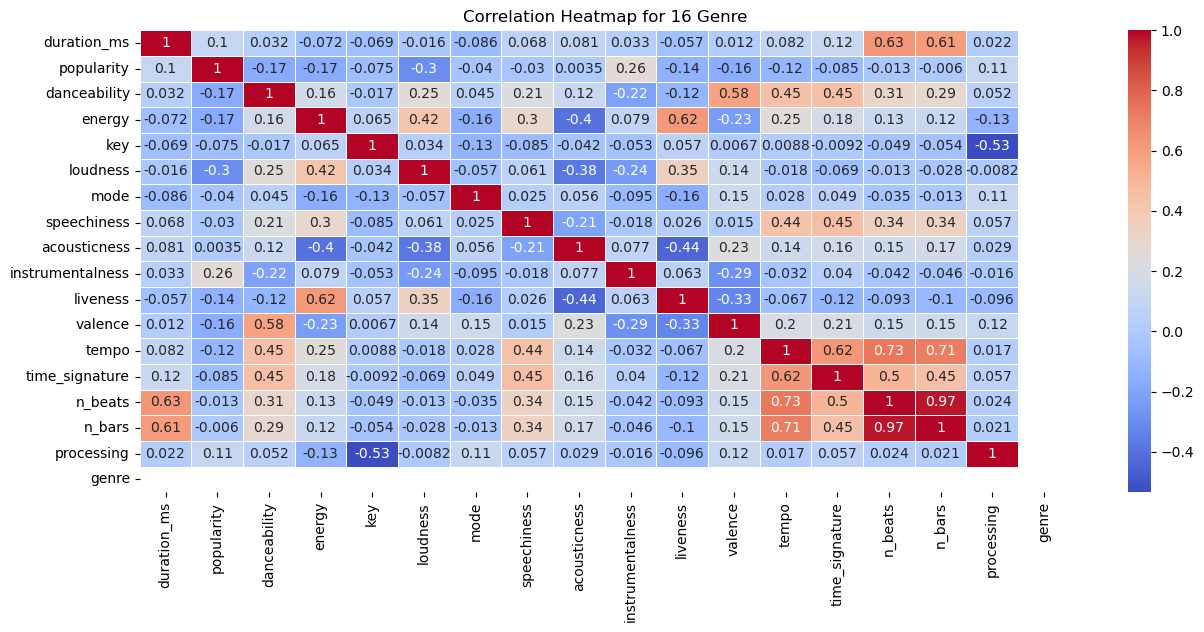

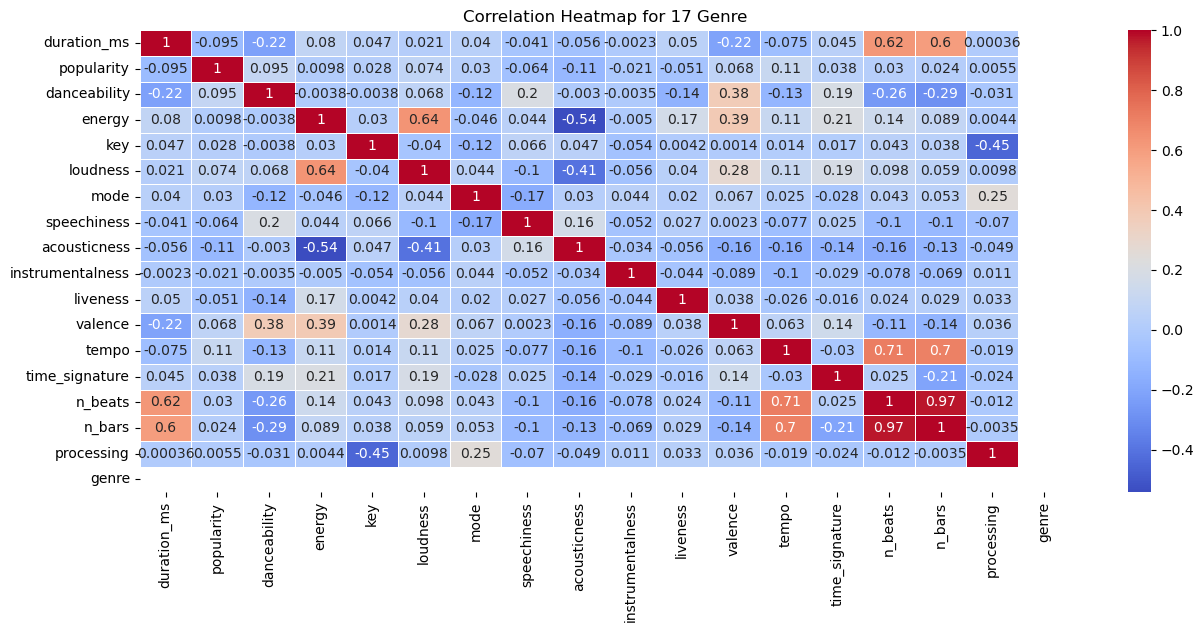

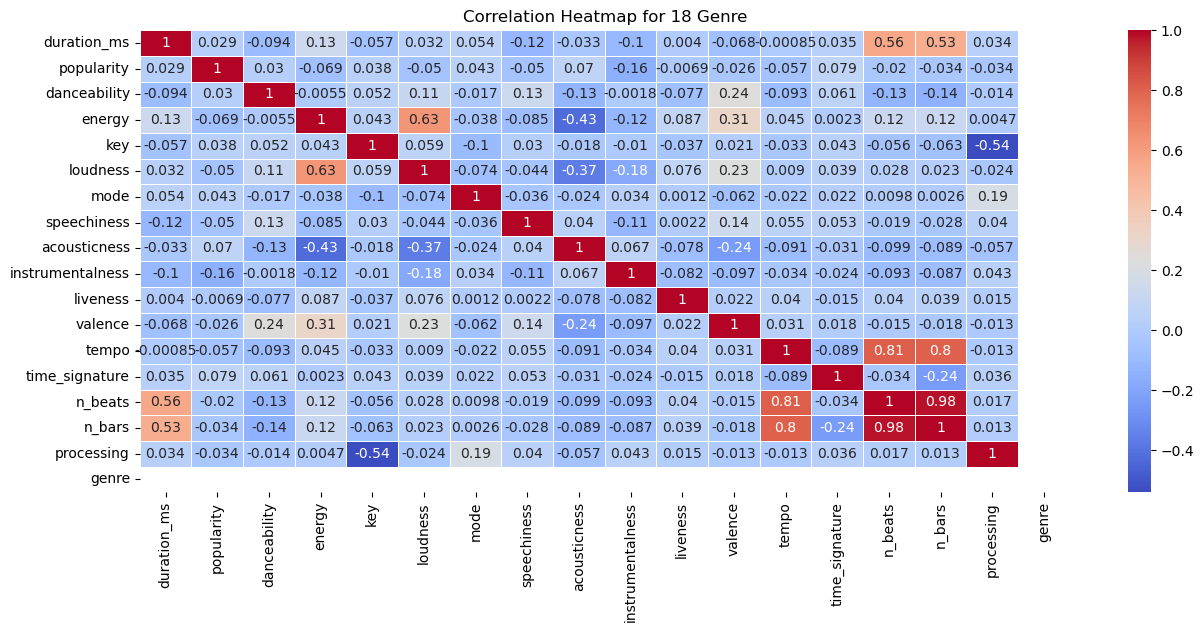

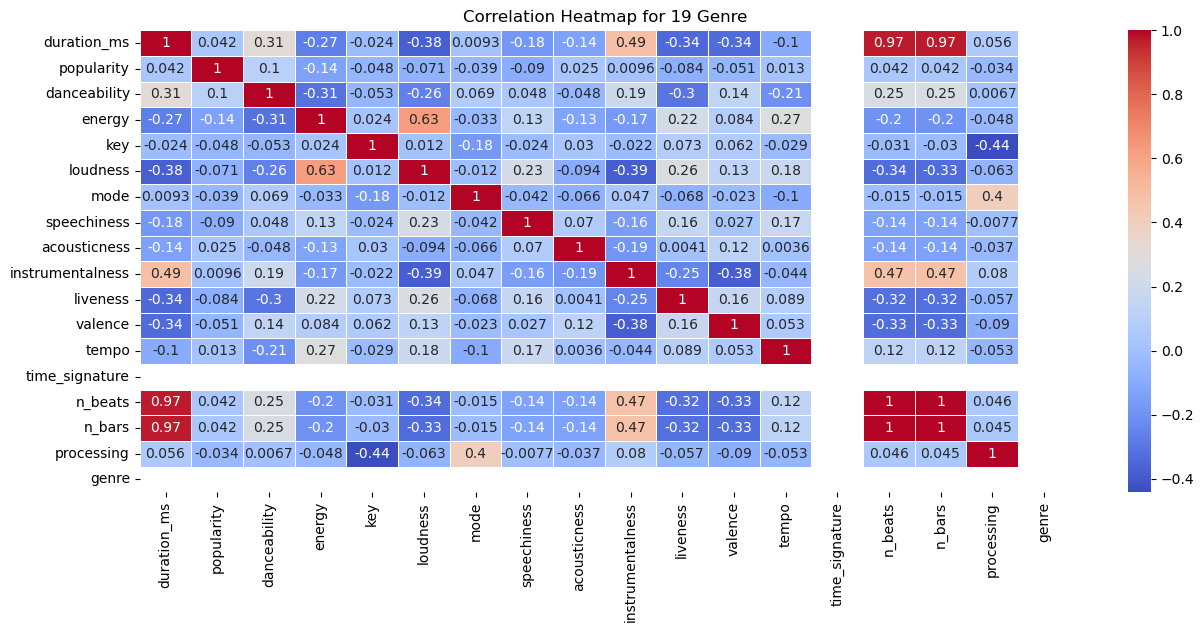

In [17]:
for i in subset:
    corr_matrix = subset[i].corr()  # Compute the correlation matrix
    plt.figure(figsize=(15, 6))  # Set the figure size
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title(f'Correlation Heatmap for {i} Genre')
    plt.show()

